<a href="https://colab.research.google.com/github/StevenDreamer1/DATA-MAINING/blob/main/exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install squarify

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
# Load the dataset
data = pd.read_csv('/content/store_data.csv', header=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Let's check the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (7501, 20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = (12, 8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Generate a range of colors for the bar plot
color = plt.cm.copper(np.linspace(0, 1, 40))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

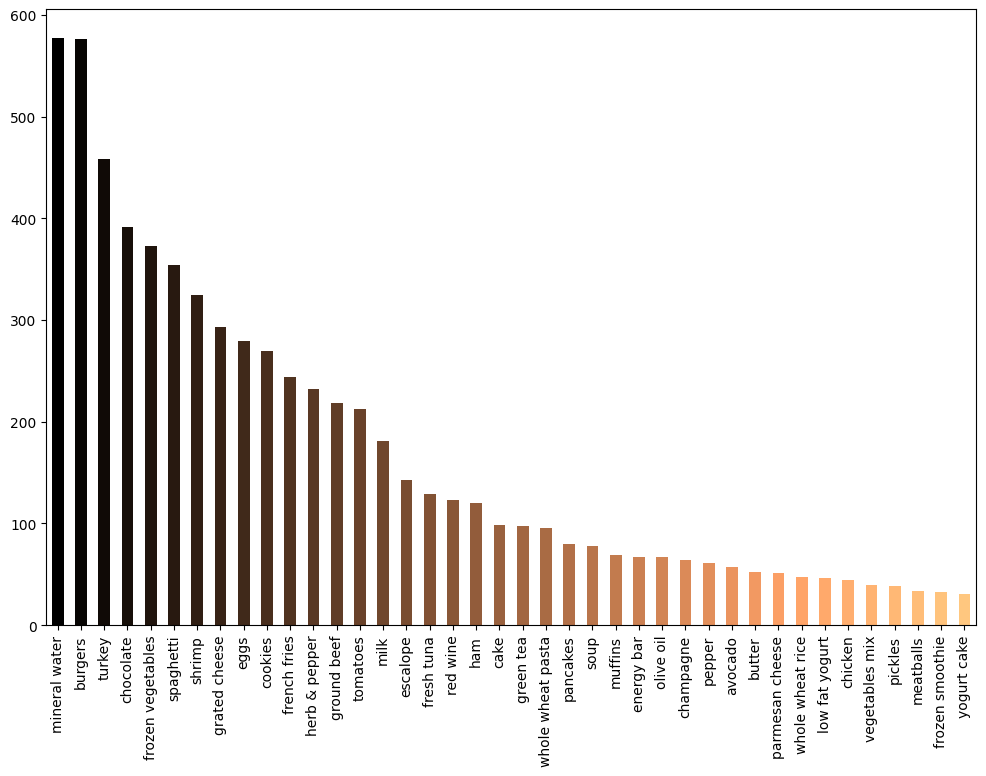

In [11]:
# Count the frequency of each item in the first column of the dataset
# Select the top 40 most frequent items and plot them as a bar chart
data[0].value_counts().head(40).plot.bar(color=color)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Frequency of Most Popular Items')

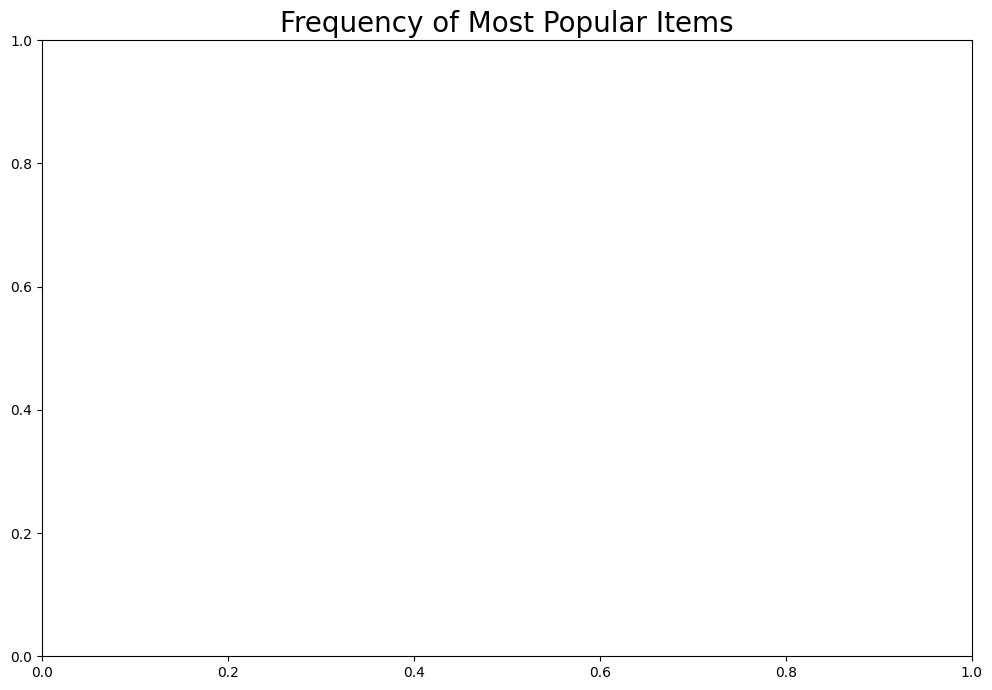

In [12]:
# Set the title of the plot
plt.title('Frequency of Most Popular Items', fontsize=20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

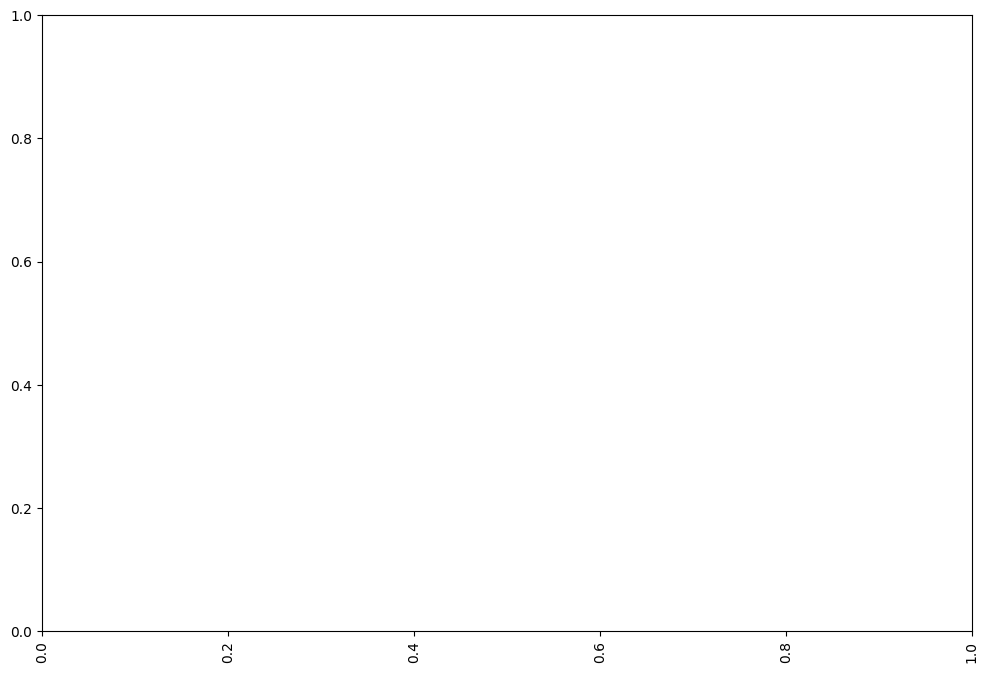

In [13]:
# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


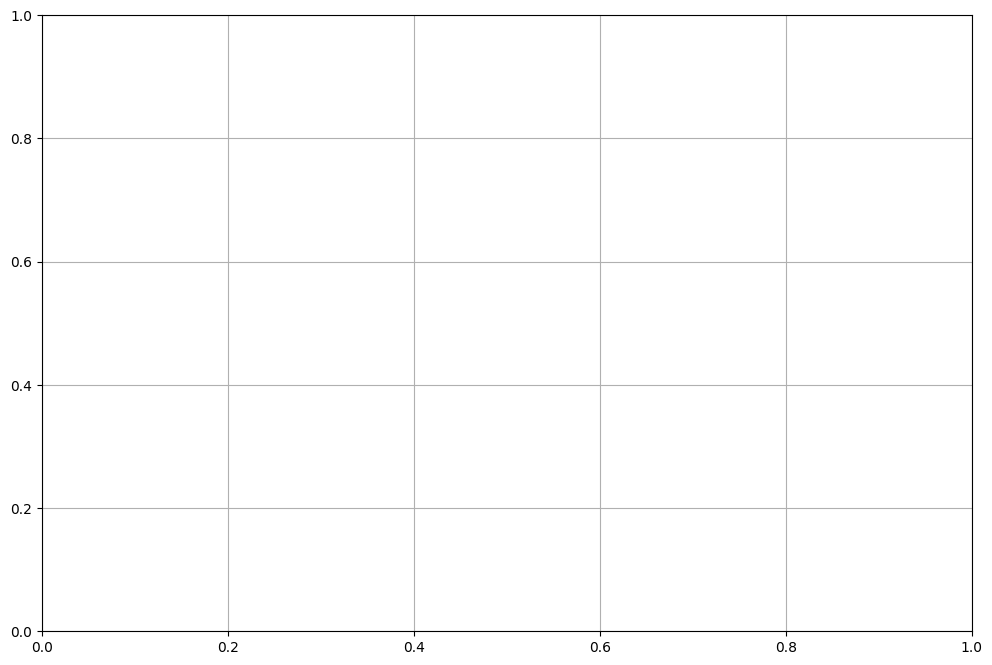

In [14]:
# Add grid lines to the plot
plt.grid()

In [16]:
# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Count the frequency of each item in the first column of the dataset
# Select the top 50 most frequent items and convert it to a DataFrame
y = data[0].value_counts().head(50).to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Get the index (item names) from the DataFrame
y.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

In [19]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = (18, 8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Generate a range of colors for the treemap
color = plt.cm.cool(np.linspace(0, 1, 50))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dis

<Axes: >

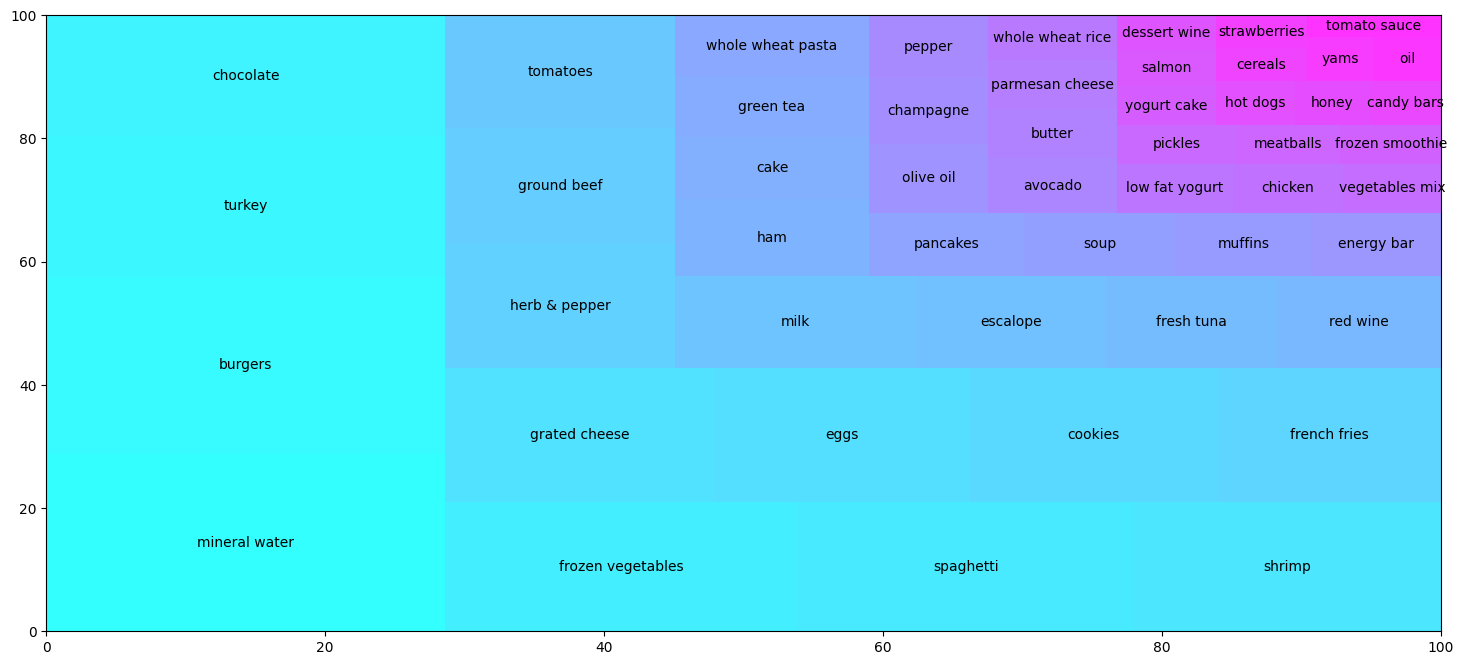

In [21]:
# Plot the treemap
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Tree Map for Popular Items')

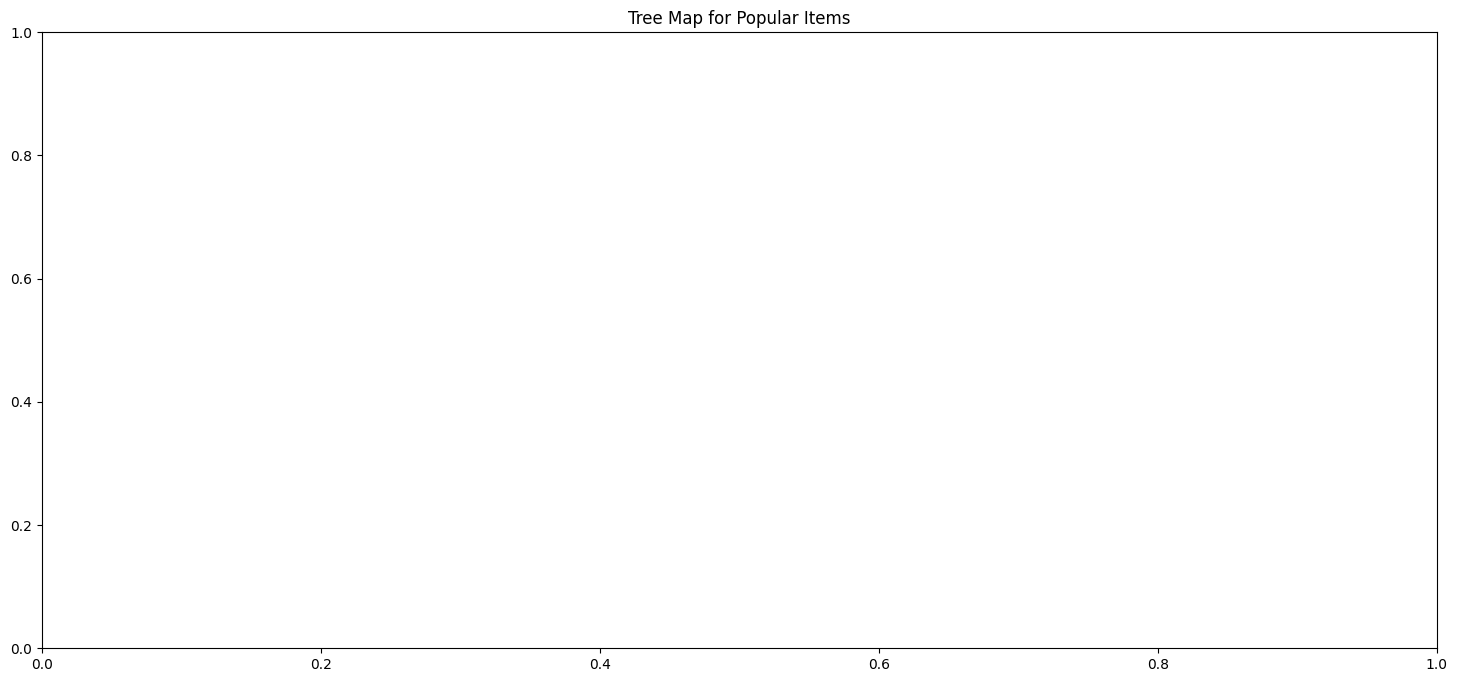

In [22]:
# Set the title of the plot
plt.title('Tree Map for Popular Items')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 1.0, 0.0, 1.0)

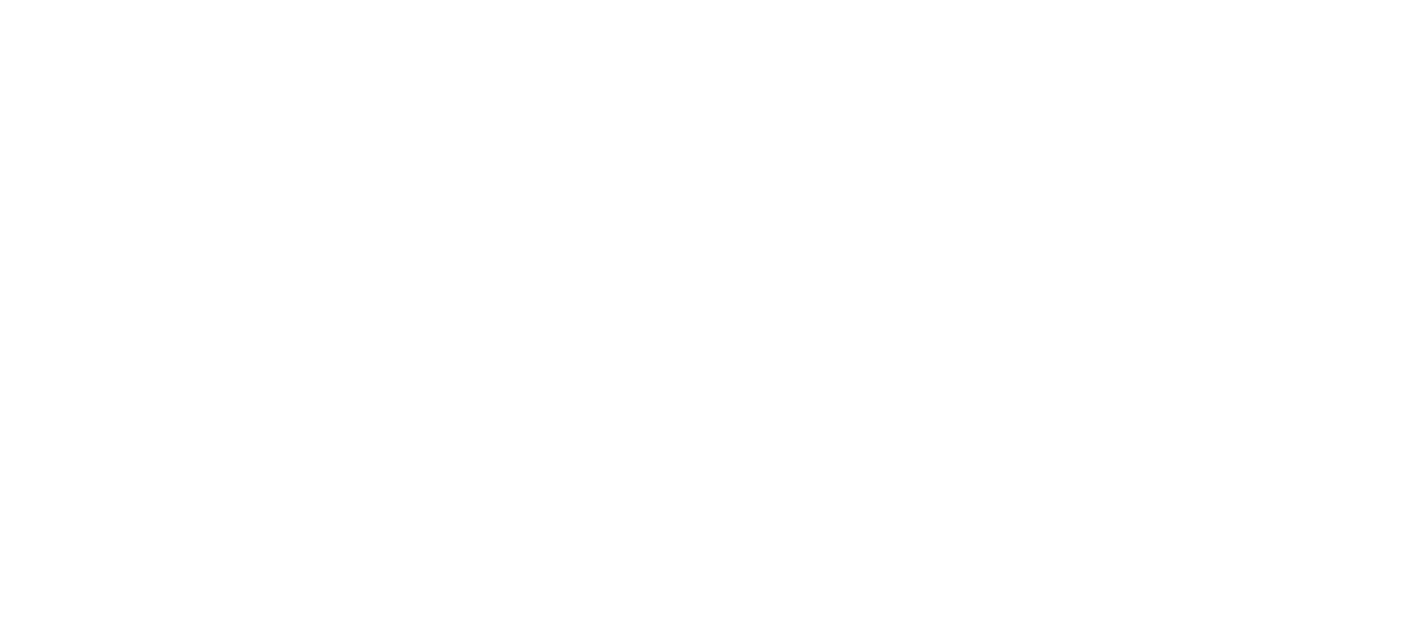

In [23]:
# Turn off the axis
plt.axis('off')

In [24]:
# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Add a new column 'food' with all values set to 'Food'
data['food'] = 'Food'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [26]:
# Select the top 15 rows from the dataset
food = data.truncate(before=-1, after=15)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Import the networkx library
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Create a graph from the DataFrame using the 'food' column as the source and the first column (0-indexed) as the target
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = (18, 8)

In [33]:
# Generate the layout for the nodes
pos = nx.spring_layout(food)


In [34]:
# Generate colors for the nodes
color = plt.cm.Wistia(np.linspace(0, 15, 1))

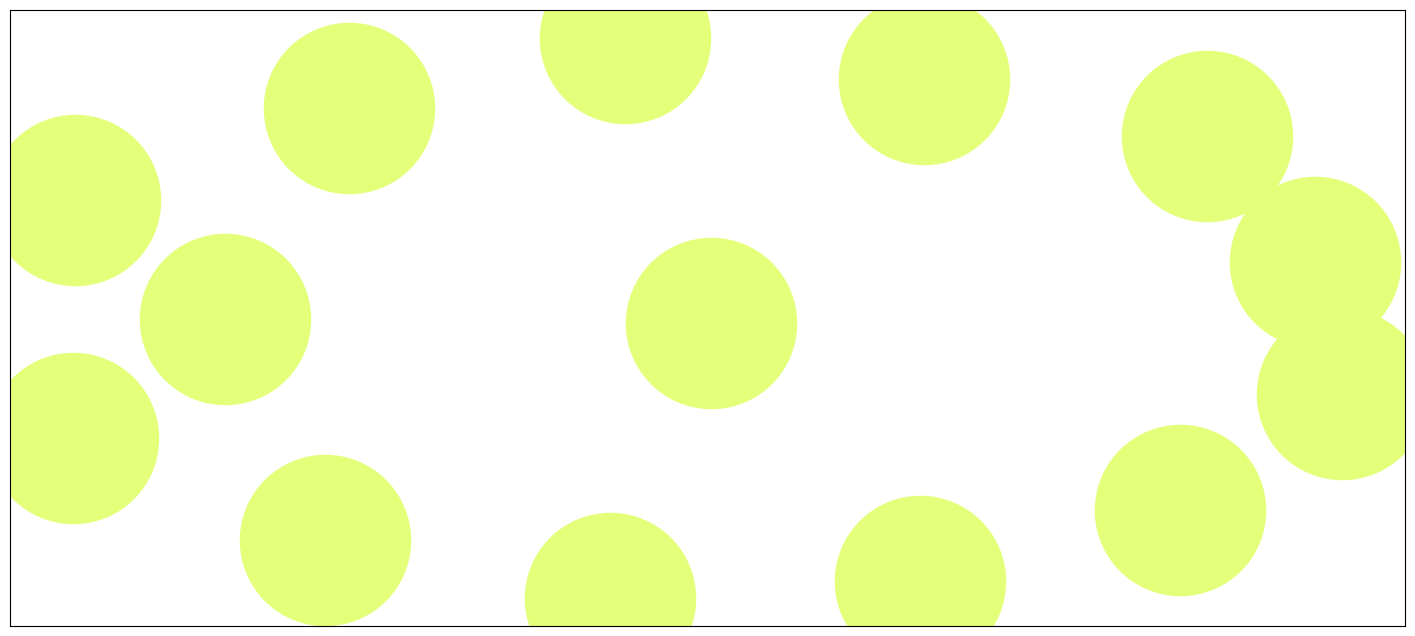

In [35]:
# Draw the nodes with specified positions, sizes, and colors
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)


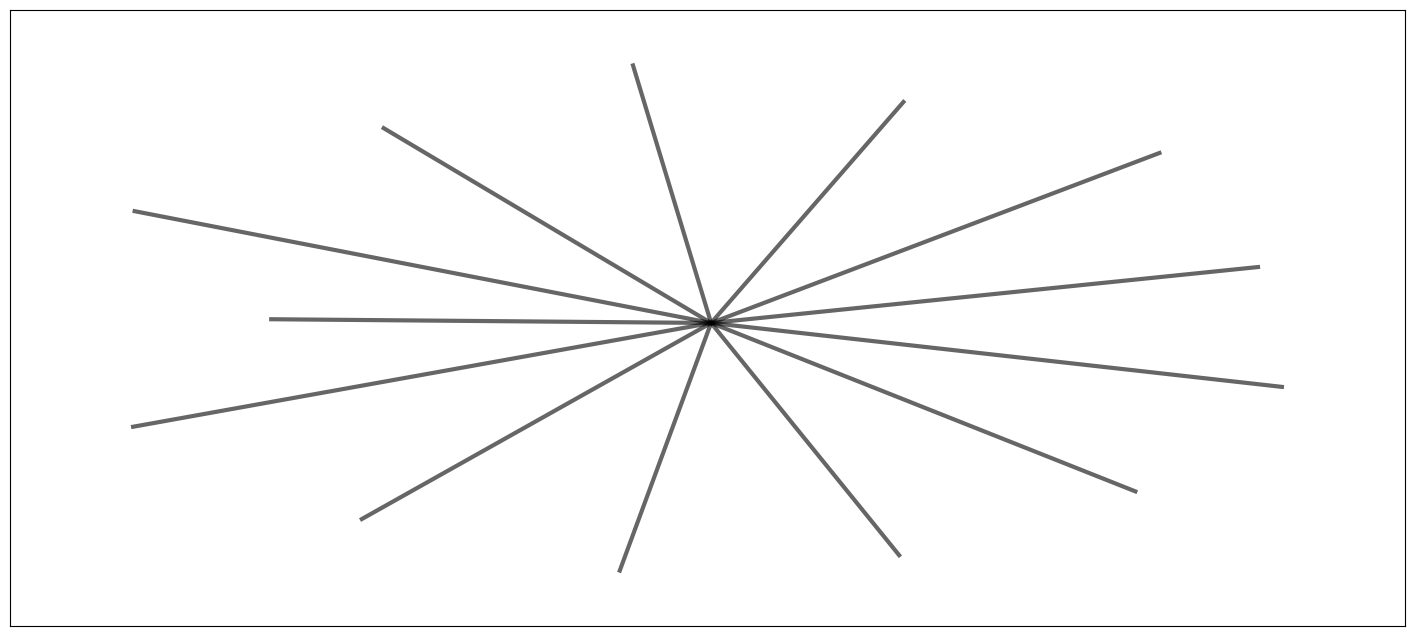

In [36]:
# Draw the edges of the graph
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')


{'Food': Text(0.00829395900748701, -0.000769094119523906, 'Food'),
 'shrimp': Text(0.9579368662708369, -0.2480863842729008, 'shrimp'),
 'burgers': Text(-0.12210882625887214, 1.0, 'burgers'),
 'chutney': Text(-0.5373770576499608, 0.7545190539671582, 'chutney'),
 'turkey': Text(-0.5736402632659939, -0.7607115330536578, 'turkey'),
 'mineral water': Text(-0.9532338967089479, -0.40236779646530746, 'mineral water'),
 'low fat yogurt': Text(-0.95063183943027, 0.43180950870533014, 'low fat yogurt'),
 'whole wheat pasta': Text(0.9183270641515582, 0.21572813013992512, 'whole wheat pasta'),
 'soup': Text(-0.7243443520854672, 0.013703445065014554, 'soup'),
 'frozen vegetables': Text(0.7547345959518574, 0.6575691628034018, 'frozen vegetables'),
 'french fries': Text(-0.14425428436259546, -0.9631822654979186, 'french fries'),
 'eggs': Text(0.7148044263138756, -0.6531478210252911, 'eggs'),
 'cookies': Text(0.322155018479552, -0.902416834978601, 'cookies'),
 'spaghetti': Text(0.329338589586939, 0.8573

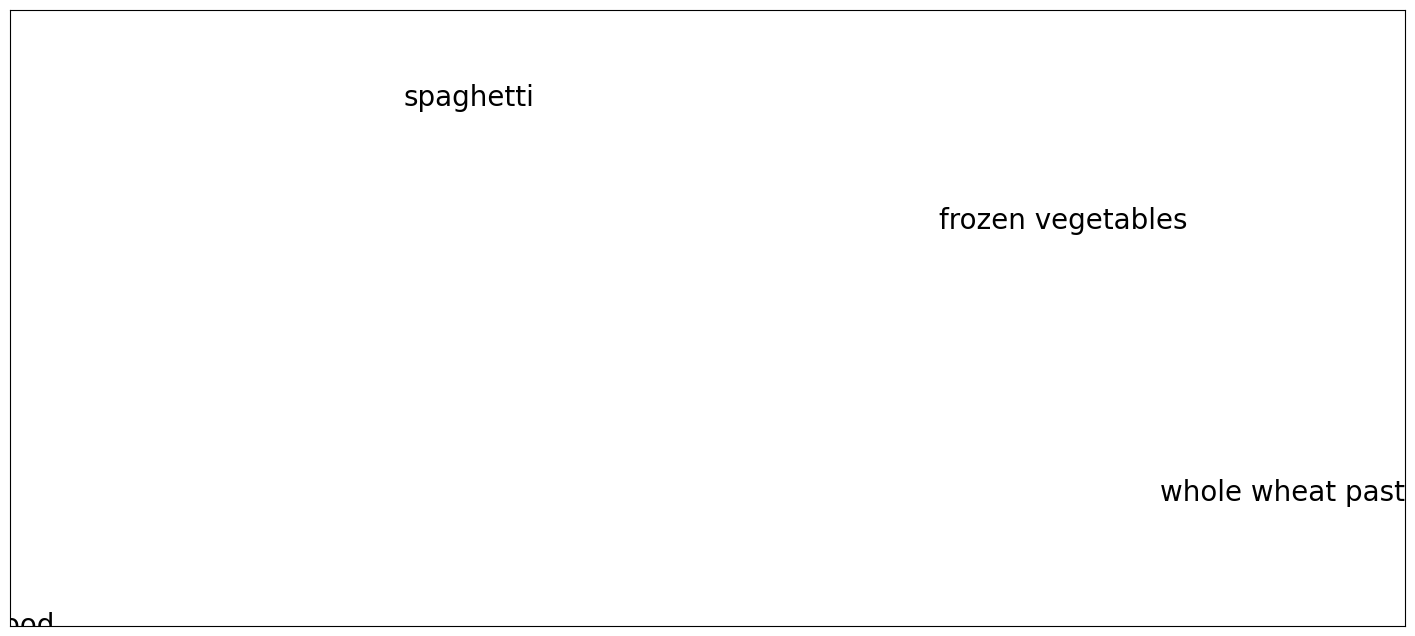

In [37]:
# Add labels to the nodes
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')


(0.0, 1.0, 0.0, 1.0)

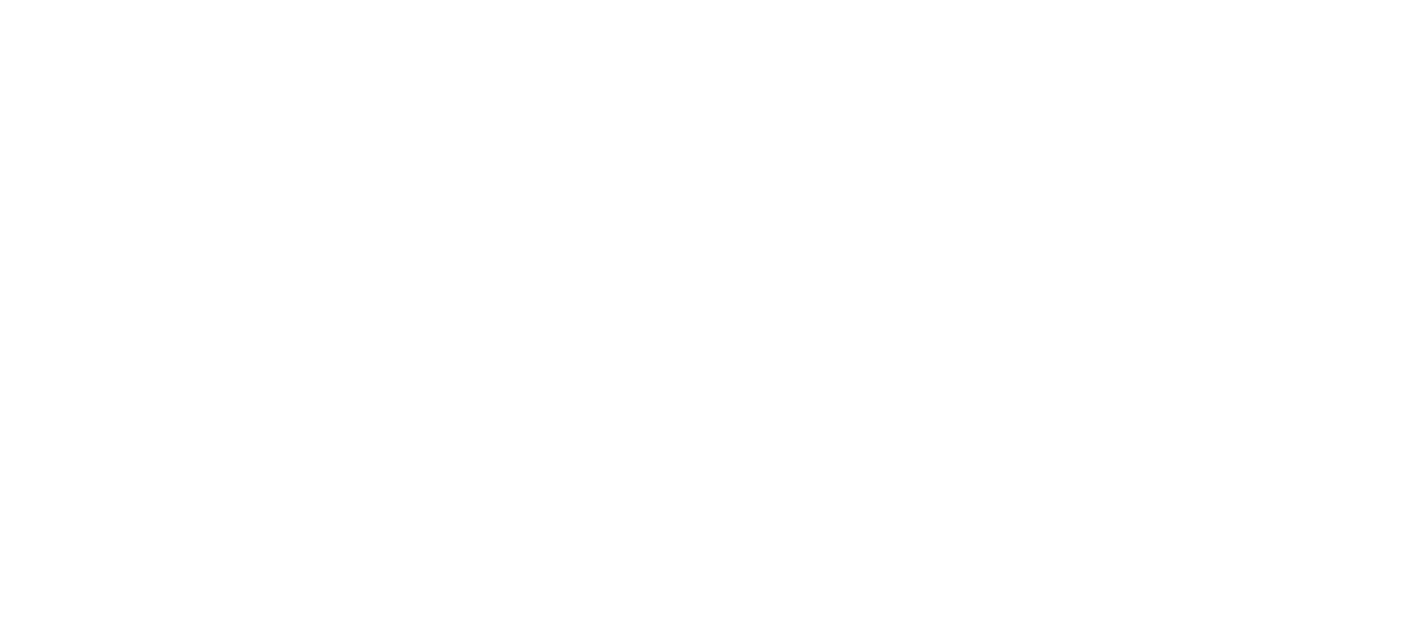

In [38]:
# Turn off the axis
plt.axis('off')

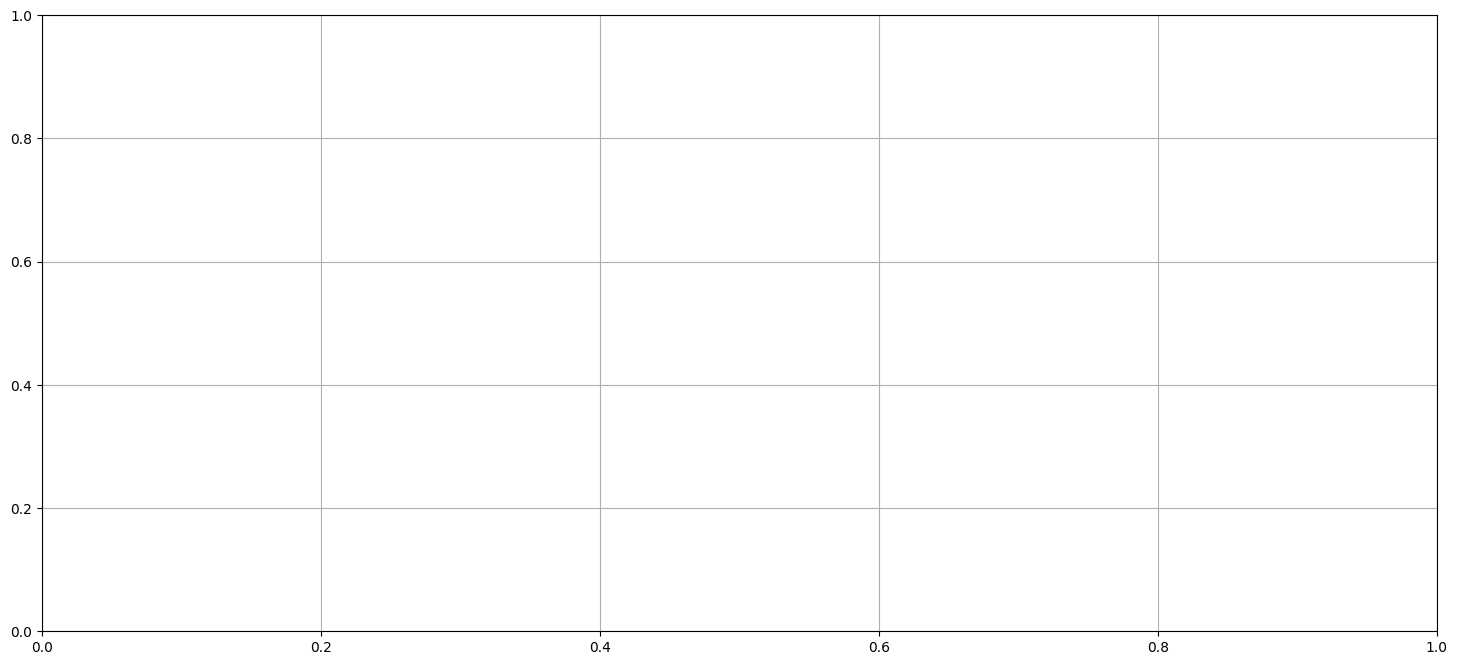

In [39]:
# Add grid lines
plt.grid()


Text(0.5, 1.0, 'Top 15 First Choices')

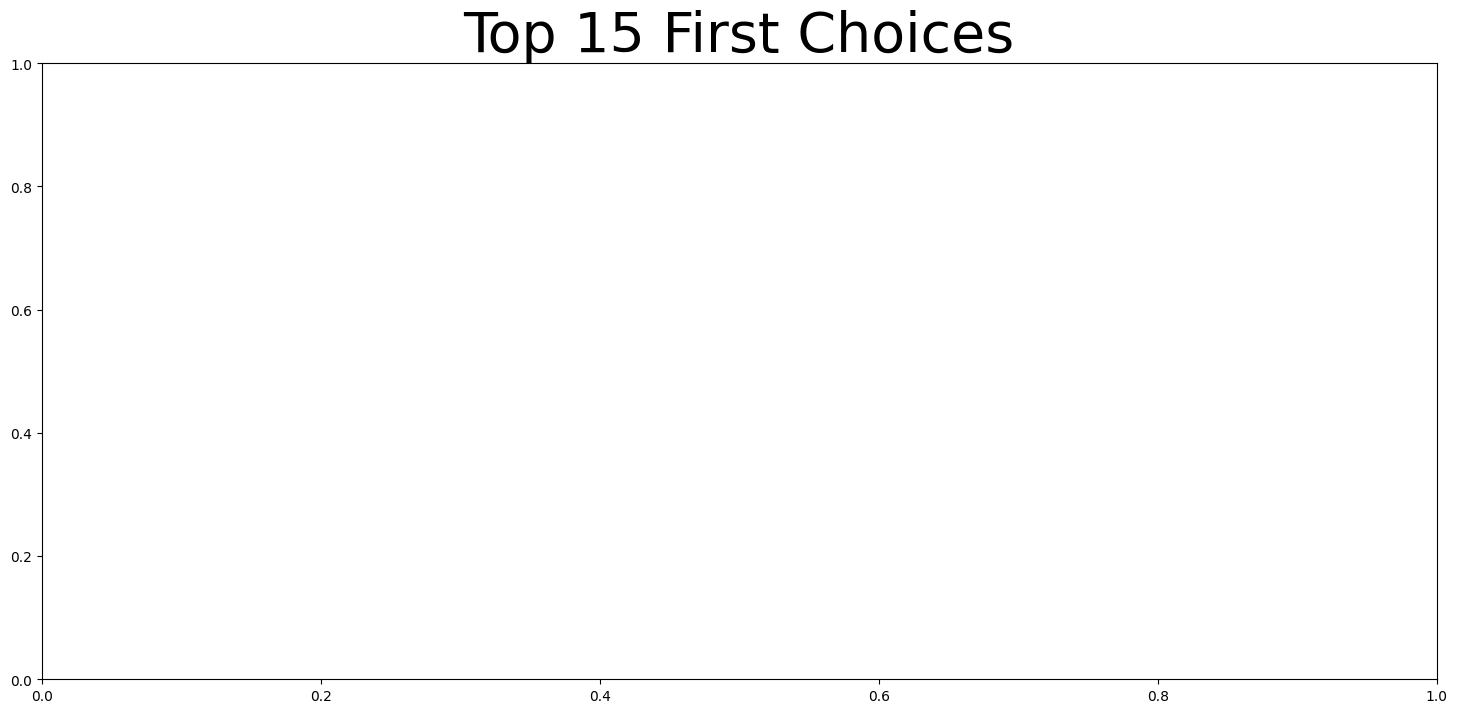

In [40]:
# Set the title of the plot
plt.title('Top 15 First Choices', fontsize=40)

In [41]:
# Display the plot
plt.show()


In [42]:
# Convert the dataset into a list of lists format
transactions = []
for i in range(len(data)):
 transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])

In [43]:
# Initialize TransactionEncoder
te = TransactionEncoder()
# Fit and transform the data into one-hot encoded format
te_ary = te.fit(transactions).transform(transactions)
# Convert one-hot encoded data into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)


In [44]:
# Apply Apriori algorithm with min_support = 0.01
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)


In [45]:
# Print the frequent itemsets
print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)

Frequent Itemsets with at least 5% support:
      support                               itemsets
0    1.000000                                 (Food)
1    0.087188                              (burgers)
2    0.081056                                 (cake)
3    0.059992                              (chicken)
4    0.163845                            (chocolate)
..        ...                                    ...
110  0.050927             (nan, eggs, mineral water)
111  0.059725        (nan, spaghetti, mineral water)
112  0.052660  (nan, Food, chocolate, mineral water)
113  0.050927       (nan, Food, eggs, mineral water)
114  0.059725  (nan, spaghetti, Food, mineral water)

[115 rows x 2 columns]
